In [48]:
import numpy as np
import pandas as pd
from probeinterface import Probe, ProbeGroup, get_probe
from probeinterface import combine_probes, write_prb, write_probeinterface
from probeinterface.plotting import plot_probe

(<matplotlib.collections.PolyCollection at 0x7eb382b911d0>,
 <matplotlib.collections.PolyCollection at 0x7eb382d45450>)

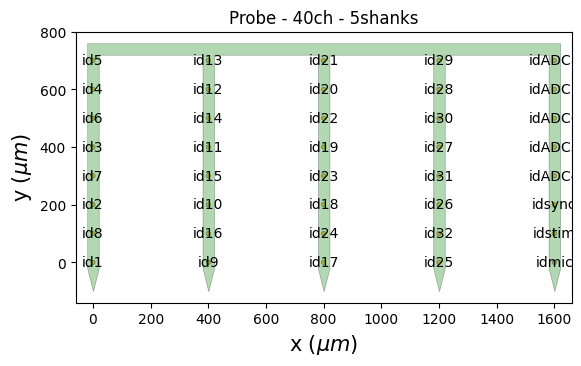

In [46]:
probe = []
for s in range(5):
    shank = Probe(ndim=2)
    shank.set_contacts(
        positions = [(s*400, y) for y in np.arange(0,800,100)],
        shapes = 'circle',
        shape_params = {'radius':7.5},
    )
    shank.create_auto_shape()
    shank.set_contact_ids(contact_ids)
    shank.set_device_channel_indices(np.arange(0,8)+s*8)
    probe.append(shank)
    
NN = combine_probes(probe)

probe_ids = np.concatenate([np.array([1,8,2,7,3,6,4,5])+s*8 for s in range(4)])
channel_ids = np.concatenate([probe_ids, ['mic','stim','sync','ADC4','ADC5','ADC6','ADC7','ADC8']])
NN.set_contact_ids(channel_ids)

plot_probe(NN, with_contact_id=True,  with_device_index=True)

In [47]:
NN.to_dataframe()

,x,y,contact_shapes,radius,shank_ids,contact_ids
0,0.0,0.0,circle,7.5,0,1
1,0.0,100.0,circle,7.5,0,8
2,0.0,200.0,circle,7.5,0,2
3,0.0,300.0,circle,7.5,0,7
4,0.0,400.0,circle,7.5,0,3
5,0.0,500.0,circle,7.5,0,6
6,0.0,600.0,circle,7.5,0,4
7,0.0,700.0,circle,7.5,0,5
8,400.0,0.0,circle,7.5,1,9
9,400.0,100.0,circle,7.5,1,16


In [37]:
# manufacturer = 'neuronexus'
# model = 'A4x8-5mm-100-400-703'
# probe = get_probe(manufacturer, model)
# probe.to_dataframe()

A4x8-5mm-100-400-703 - neuronexus - 32ch - 4shanks


In [49]:
probegroup = ProbeGroup()
probegroup.add_probe(NN)
write_probeinterface('NeuroNexus40.json', probegroup)